## 数据转换方法

#### 介绍

数据转换同样是数据预处理过程中经常会需要遇到的情况。这里的转换往往不仅是数据格式或类型的转换，更多的是通过一些统计学方法对数据进行标准化或离散化处理。本次实验中，我们将介绍数据转换涉及到的一些内容。

### 知识点 

* Min-Max 标准化
* Z-Score 标准化
* 独热编码
* 数据离散化

### 特征工程概述

<div style="color: #999;font-size: 12px;font-style: italic;">注：特征工程的概念非常大，涵盖内容丰富，文中的特征工程特指数据分析中的特征工程。</div>

数据挖掘分析，除了对已有数据的统计归纳之外，更重要的往往是通过建立模型预测，从而得到更多的信息。前面的内容中，我们已经学习到了如何采集数据，以及对数据进行清洁和预处理。完成这些工作的目的，就是为了得到合适的数据，从而建立机器学习模型。关于什么是机器学习算法，我们将在后面的内容中深入讨论？本次实验中，我们还是要进一步讨论如何得到「合适的数据」。

![](https://upload-images.jianshu.io/upload_images/15406304-d6a5656bbef715f6.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

建立机器学习分析预测模型，简单来讲就是将「数据」交给算法处理，让机器学习算法学习到合适的「参数」，并最终保存为可以使用的「模型」。此时，输入给算法的数据显然是非常重要的。想要预测模型性能达到最佳，一般来讲，不仅是要选取最好的算法，还要尽可能地输入更好的数据。这里的更好，通俗来讲就是想让数据对于模型的训练都是有用的，而不包含无效的冗余数据对提升模型性能没有太多帮助。那么，如何从已有的数据集中得到包含更多有效信息，更好的数据呢？这就要用到「特征工程」的相关方法。

特征工程（英文：Feature Engineering）是数据分析中非常重要的一项工作。简单来讲，特征工程就是需要我们去设计数据特征，以帮助训练得到性能更加优异的模型。特征工程往往会在数据预处理的后面阶段实施，也就是接下来要介绍的数据预处理中的数据转换和规约环节。特征工程并不是数据分析过程中的必需操作，但应用特征工程往往能得到更加优异的结果，所以是必须要了解学习的内容。纵观 Kaggle 等国内外的数据分析比赛，成绩较好的队伍并不是应用了非常独特的算法（也就是大家常用的机器学习算法），而关键在于特征工程做得非常好。

特征工程由可以被细化为 3 块主要内容，分别是：特征提取、特征选择、特征构造。其中，特征提取和特征选择的内容又可以等同于数据转换和数据规约。下面，我们通过一张图来概括特征工程与数据预处理之间的关系：

![](https://upload-images.jianshu.io/upload_images/15406304-8e6da5368f600975.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 标准化

标准化（无量纲化）是数据预处理中的常用手段。标准化的目的主要是消除不同特征之间的量纲和取值范围不同造成的差异。这些差异，不仅会造成数据偏重不均，还会在可视化方面造成困扰。

维基百科 [<i class="fa fa-external-link-square" aria-hidden="true"> Normalization</i>](https://en.wikipedia.org/wiki/Normalization)

例如，我们生成两列随机数据，其中 B 列数值远大于 A 列。

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

np.random.seed(10)  # 随机数种子
df = pd.DataFrame({'A': np.random.random(
    20), 'B': np.random.random(20) * 10000})
df

,A,B
0,0.771321,5425.443680
1,0.020752,1421.700476
2,0.633648,3733.407601
3,0.748804,6741.336151
4,0.498507,4418.331744
5,0.224797,4340.139933
6,0.198063,6177.669785
7,0.760531,5131.382426
8,0.169111,6503.971819
9,0.088340,6010.389534


当你使用 Matplotlib 绘图时，你会发现由于 B 列数据太大，A 列以及无法看出趋势，近似一条直线。

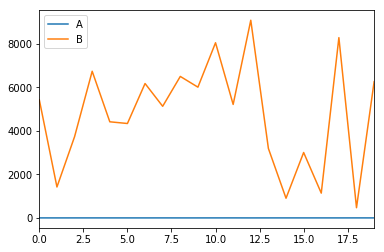

In [2]:
df.plot()  # 绘图

这就是数据取值范围的不同造成的困扰。一般情况下，我们有以下常用的标准化方法。

### Z-Score 标准化

维基百科 [<i class="fa fa-external-link-square" aria-hidden="true"> Standard score</i>](https://en.wikipedia.org/wiki/Standard_score)

Z-Score 标准化是常用的标准化手段之一，其公式为：

$$\hat x=\frac{x-\mu}{\sigma}$$

其中，$\mu$ 为样本数据的均值，$\sigma$ 为样本数据的标准差。Z-Score 标准化之后的数据的均值为 0，方差为 1。

下面使用 Z-Score 标准化对上面的 DataFrame 进行标准化处理并绘图。

In [3]:
df_z_score = (df - df.mean()) / df.std()  # Z-Score 标准化
df_z_score

,A,B
0,0.826146,0.258411
1,-1.611982,-1.334836
2,0.378934,-0.414917
3,0.753003,0.782057
4,-0.060055,-0.142358
5,-0.949169,-0.173474
6,-1.036010,0.557752
7,0.791096,0.141393
8,-1.130057,0.687600
9,-1.392431,0.491184


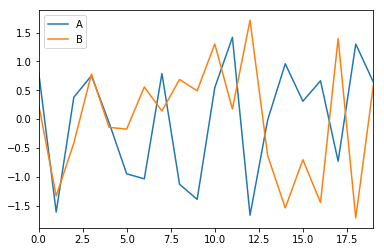

In [4]:
df_z_score.plot()

Z-Score 标准化方法在 Scipy 中有一个对应的 API `scipy.stats.zscore` 可供使用:

In [5]:
from scipy import stats

stats.zscore(df)

array([[ 0.84760749,  0.26512422],
       [-1.6538586 , -1.36951283],
       [ 0.38877825, -0.42569553],
       [ 0.77256451,  0.80237311],
       [-0.06161515, -0.14605662],
       [-0.97382639, -0.17798055],
       [-1.06292369,  0.57224099],
       [ 0.81164723,  0.14506572],
       [-1.15941388,  0.70546267],
       [-1.4286044 ,  0.50394428],
       [ 0.5611206 ,  1.33758198],
       [ 1.4544123 ,  0.17980566],
       [-1.70986126,  1.75984547],
       [-0.01600548, -0.64659256],
       [ 0.98525158, -1.58063582],
       [ 0.31838311, -0.72227096],
       [ 0.6824181 , -1.48458856],
       [-0.7502667 ,  1.43335618],
       [ 1.33570193, -1.75849374],
       [ 0.65849043,  0.6070269 ]])

你可能会发现，为什么这里计算得到的结果与上面公式计算的结果不一致。其实这是计算精度的问题，`scipy.stats.zscore` 会使用 DataFrame 包含的 NumPy 数组进行运算，NumPy 数组的精度更高。你也可以通过下面的代码重新计算：

In [6]:
(df.values - df.values.mean(axis=0)) / df.values.std(axis=0)  # 将 DataFrame 处理从 NumPy 数组再运算

array([[ 0.84760749,  0.26512422],
       [-1.6538586 , -1.36951283],
       [ 0.38877825, -0.42569553],
       [ 0.77256451,  0.80237311],
       [-0.06161515, -0.14605662],
       [-0.97382639, -0.17798055],
       [-1.06292369,  0.57224099],
       [ 0.81164723,  0.14506572],
       [-1.15941388,  0.70546267],
       [-1.4286044 ,  0.50394428],
       [ 0.5611206 ,  1.33758198],
       [ 1.4544123 ,  0.17980566],
       [-1.70986126,  1.75984547],
       [-0.01600548, -0.64659256],
       [ 0.98525158, -1.58063582],
       [ 0.31838311, -0.72227096],
       [ 0.6824181 , -1.48458856],
       [-0.7502667 ,  1.43335618],
       [ 1.33570193, -1.75849374],
       [ 0.65849043,  0.6070269 ]])

现在，得到的结果就一致了。除了 SciPy，scikit-learn 也提供了 Z-Score 标准化的 API `sklearn.preprocessing.StandardScaler()`，这里就不再赘述了。

### Min-Max 标准化

维基百科 [<i class="fa fa-external-link-square" aria-hidden="true"> Feature scaling</i>](https://en.wikipedia.org/wiki/Feature_scaling)

Min-Max 标准化同样是常用手段，其效果类似于区间缩放，可以将数值缩放到 0-1 之间。其公式为：

$$\hat x=\frac{x-x_{min}}{x_{max}-x_{min}}$$

其中，$x_{max}$ 为样本数据的最大值，$x_{min}$ 为样本数据的最小值，$x_{max}-x_{min}$ 为极差。

接下来，我们使用 Min-Max 标准化对上面的 DataFrame 进行标准化处理并绘图。

In [7]:
df_min_max = (df - df.min()) / (df.max() - df.min())  # Min-Max 标准化
df_min_max

,A,B
0,0.808233,0.575163
1,0.017698,0.110558
2,0.663229,0.378815
3,0.784517,0.727862
4,0.520892,0.458295
5,0.232608,0.449221
6,0.204451,0.662453
7,0.796868,0.541039
8,0.173957,0.700318
9,0.088885,0.643041


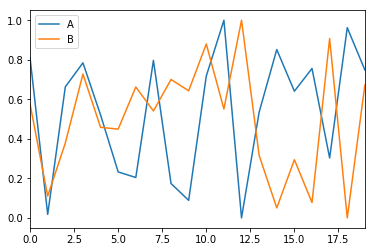

In [8]:
df_min_max.plot()

可以看到，处理之后的数据同样能反应变化趋势，但取值范围已经变化到 0-1 之间了。

同样，scikit-learn 也提供了 Min-Max 标准化的 API `sklearn.preprocessing.MinMaxScaler()`，使用方法如下：

In [9]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(df)

array([[0.80823251, 0.57516284],
       [0.01769843, 0.1105581 ],
       [0.66322948, 0.37881459],
       [0.7845168 , 0.72786241],
       [0.52089242, 0.45829496],
       [0.23260785, 0.44922138],
       [0.20445058, 0.6624531 ],
       [0.79686805, 0.54103921],
       [0.17395695, 0.70031804],
       [0.08888513, 0.64304147],
       [0.71769454, 0.87998216],
       [1.        , 0.55091317],
       [0.        , 1.        ],
       [0.53530637, 0.31603012],
       [0.85173194, 0.05055167],
       [0.64098263, 0.29452043],
       [0.75602799, 0.0778507 ],
       [0.30325904, 0.90720358],
       [0.96248417, 0.        ],
       [0.74846616, 0.67234013]])

### 独热编码

维基百科 [<i class="fa fa-external-link-square" aria-hidden="true"> One-Hot Encoding</i>](https://en.wikipedia.org/wiki/One-hot)

在对数据的预处理过程中，我们会遇到有一些特征列中的样本并不是连续存在的，而是以分类形式存在的情况。例如，某一装置的状态有三种情况，分别为：正常、机械故障、电路故障。如果我们要将这些数据运用到后续的预测分析中，就需要对文字状态进行转换。一般情况下，可以用 0 表示正常，1 代表机械故障，2 代表电路故障。

但是这种映射方式，往往会让学习器认为 2 代表电路故障比 1 代表机械故障更「大」，从而影响模型分析结果，这肯定是不行的。

所以，对于以分类形式存在的特征变量，我们会采用一种叫独热编码（One-Hot Encoding）的方式将其转换成二元特征编码，进一步对特征进行了稀疏处理。独热编码采用位状态寄存器来对个状态进行编码，每个状态都由它独立的寄存器位，并且在任意时候只有一位有效。

| 自然状态码 | 独热编码 |
|:----------:|:--------:|
| 000 | 000001 |
| 001 | 000010 |
| 010 | 000100 |
| 011 | 001000 |
| 100 | 010000 |
| 101 | 100000 |

比如，下面我们把不同种类的水果名称编码为数值特征。

<img width='600px' style="border:2px solid #888;" src="https://doc.shiyanlou.com/document-uid214893labid7506timestamp1539842007500.png">

Pandas 中，我们可以使用 `get_dummies` 很方便地完成独热编码。

In [10]:
df = pd.DataFrame({'fruits': ['apple', 'banana', 'pineapple']*2})  # 示例装置状态表
df

,fruits
0,apple
1,banana
2,pineapple
3,apple
4,banana
5,pineapple


In [11]:
pd.get_dummies(df)  # 独热编码

,fruits_apple,fruits_banana,fruits_pineapple
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
5,0,0,1


### 数据离散化

数据离散化一般特指将连续数据离散化，例如我们统计了一个包含「年龄」的数据集，这些年龄都是以数值型数据呈现，可以被看作是连续数据。如果，我们按照年龄段对数据进行分割，1-10 岁为少儿，11-20 岁为少年，21-30 岁为青年等，这就可以被看作是数据离散化的过程。

数据离散化有时候是为了算法实施需要，也有可能离散数据更适合数据的信息表达。当我们对连续数据进行按区间离散化时，你可以通过编写代码实现。不过，这里介绍 Pandas 中一个非常方便的区间离散化方法 `pd.cut`。

例如，我们将数组 `[1, 2, 7, 8, 5, 4, 12, 6, 3]` 等间距分割为 3 部分：

In [12]:
pd.cut(np.array([1, 2, 7, 8, 5, 4, 12, 6, 3]), bins=3)  # bins 指定划分数量

[(0.989, 4.667], (0.989, 4.667], (4.667, 8.333], (4.667, 8.333], (4.667, 8.333], (0.989, 4.667], (8.333, 12.0], (4.667, 8.333], (0.989, 4.667]]
Categories (3, interval[float64]): [(0.989, 4.667] < (4.667, 8.333] < (8.333, 12.0]]

上面的返回值中，首先关注 `Categories (3, interval[float64]): [(0.989, 4.667] < (4.667, 8.333] < (8.333, 12.0]]` 给出的 3 个区间范围，也就是由数组确定的 3 个等间距区间。返回值的前半部分，给出了数组中每个数所处划分区间的列表。

此时，如果我们按照 3 个区间对数据添加类别标签 `"small", "medium", "large"`，只需要指定 `labels=` 参数即可：

In [13]:
pd.cut(np.array([1, 2, 7, 8, 5, 4, 12, 6, 3]),
       bins=3, labels=["small", "medium", "large"])

[small, small, medium, medium, medium, small, large, medium, small]
Categories (3, object): [small < medium < large]

一般情况下，区间返回会以最大值为准，向最小值方向扩展 0.1% 以保证元素被有效分割。所以上面的区间不是以最小值 1 开始，而是 0.989。其中：

$$ 1 - 0.989 = (12 - 1) * 0.1\% $$

当然，你可以自行指定划分区间：

In [14]:
pd.cut(np.array([1, 2, 7, 8, 5, 4, 12, 6, 3]), 
       bins=[0, 5, 10, 15], labels=["small", "medium", "large"])

[small, small, medium, medium, small, small, large, medium, small]
Categories (3, object): [small < medium < large]

上面，我们指定分割数依次为 `0, 5, 10, 15`，即会组成左开右闭的 3 个划分区间 `(0, 5] < (5, 10] < (10, 15]`。

### 实验总结

本次实验中，我们主要了解了数据转换过程中涉及到的标准化、独热编码、离散化等方法。这 3 类方法基本上会在每一个数据分析项目中出现，十分常用。